## ロバストマルコフ決定過程の基礎


MDPにおける遷移関数モデルや報酬関数モデルのパラメータが正確に把握できない状況により、各モデルに不確実性が生じる場合を想定します。RMDPでは、モデルの不確実性を考慮しながら最適方策を求めるアプローチの1つです。RMDPは、真の遷移関数が不確実性集合という遷移関数の集合の中に属すると仮定し、不確実性集合内の最悪ケース(総報酬が低くなるor総コストが高くなる)遷移関数において、報酬が高くなるor総コストが低くなる方策(ロバスト方策)を求めます。



## 不確実性集合
不確実性集合に仮定を置かない一般的なRMDPを解くことはNP困難になる可能性があります(Wiesemann et al., 2013)[75]。これに対し、不確実性集合に対して$(s,a)or(s)$-rectangular、という仮定を置くことを考えます。仮定により、動的計画法を用いてRMDPを解くことが可能となり、near-optimalなロバスト方策を獲得することができます。

### 仮定：$(s,a),(s)$-rectangular

**$(s,a)$-rectangular**
不確実性集合を$\mathcal{P}$と仮定します。以下を満たす場合、$\mathcal{P}$は$(s,a)$-rectangular setsと呼ばれます。$X$は直積を示しています。$\mathcal{P}_{s, a} \subseteq \Delta(\mathcal{S})$(状態に対する確率単体の部分集合)

$$
\mathcal{P}=\underset{(s, a) \in \mathcal{S} \times \mathcal{A}}{X} \mathcal{P}_{s, a}
$$
**解説と例**
$\mathcal{P}_{s, a}$は、$s,a \in \mathcal{S},{A}$を入力した場合に、$s\in S$の確率を出力する関数の集合ととらえることができます。$\underset{(s, a) \in \mathcal{S} \times \mathcal{A}}{X} \mathcal{P}_{s, a}$は任意の$s,a$に対して$s\in S$の確率を出力する関数の集合が存在するということを意味しています。
$|S|=2,|A|=2$を考えます。$\mathcal{P}_{1, 1},\mathcal{P}_{1, 2},\mathcal{P}_{2, 1},\mathcal{P}_{2, 2} \subseteq \Delta(\mathcal{S})$とします。
- $\mathcal{P}_{1,1} = {(P(1|1,1)=0.1, P(2|1,1)=0.9), (P(1|1,1)=0.7, P(2|1,1)=0.3)}$
- $\mathcal{P}_{1,2} = {(P(1|1,2)=0.4, P(2|1,2)=0.6), (P(1|1,2)=0.8, P(2|1,2)=0.2)}$
- $\mathcal{P}_{2,1} = {(P(1|2,1)=0.5, P(2|2,1)=0.5), (P(1|2,1)=0.6, P(2|2,1)=0.4)}$
- $\mathcal{P}_{2,2} = {(P(1|2,2)=0.3, P(2|2,2)=0.7), (P(1|2,2)=0.2, P(2|2,2)=0.8)}$
のようにあらわされます。

**$(s)$-rectangular**
$\mathcal{P}_{s} \subseteq \Delta(\mathcal{S})^{|\mathcal{A}|}$ であり、$\Delta(\mathcal{S})^{|\mathcal{A}|}:=\left\{\left(P_{a}\right)_{a \in \mathcal{A}} \mid P_{a} \in \Delta(\mathcal{S})\right.$, for all $\left.a \in \mathcal{A}\right\}$
とします。同様に、以下を満たす場合、$\mathcal{P}$は$(s)$-rectangular setsと呼ばれます。
$$
\mathcal{P}=\underset{s \in \mathcal{S}}{X} \mathcal{P}_{s}
$$
**解説と例**
$\mathcal{P}_{s}$は任意の$s$を入力とし、その$s$のうえで実行できる$a$について、その遷移確率すべてを要素とした集合の部分集合といえます。各 $\mathcal{P}_{s} \subseteq \Delta(\mathcal{S})^{|\mathcal{A}|}$ は次のように表されます：
- $\mathcal{P}_{1} = {((P(1|1,1)=0.1, P(2|1,1)=0.9), (P(1|1,2)=0.4, P(2|1,2)=0.6)),\\((P(1|1,1)=0.7, P(2|1,1)=0.3), (P(1|1,2)=0.8, P(2|1,2)=0.2))}$
- $\mathcal{P}_{2} = {((P(1|2,1)=0.5, P(2|2,1)=0.5), (P(1|2,2)=0.3, P(2|2,2)=0.7)),\ ((P(1|2,1)=0.6, P(2|2,1)=0.4), (P(1|2,2)=0.2, P(2|2,2)=0.8))}$

### 不確実性集合の例




#### (コラム)なぜ不確実性集合に仮定を置かないとNP困難なのか





## RMDPを解く(関連研究)


### ロバスト動的計画法
(Iyengar, 2005; Nilim & El Ghaoui, 2005; Kaufman & Schaefer, 2013; Ho et al., 2021)

#### 準備
Iyengarの研究を取り上げます。割引無限ロバストマルコフ決定過程は、 $\left\{T,\left\{\mathcal{S}_{t}, \mathcal{A}_{t}, \mathcal{P}_{t}, r_{t}(\cdot, \cdot, \cdot): t \in T\right\}\right\}$ のタプルで表現されます。$T=\{0, \ldots, N-1\}$ ($N \geq 1$) 

#### ロバスト価値反復

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable, Dict

class SimpleMDP:
    def __init__(self, p_success: float = 0.7):
        """
        シンプルなマルコフ決定過程の初期化。
        Args:
            p_success (float): 行動0が成功して状態1に進む確率
        """
        self.state_space = [0, 1]
        self.action_space = [0, 1]
        self.p_success = p_success
        self.terminal_state = 1

    def get_actions(self, state: int) -> List[int]:
        """
        ある状態における可能なアクションのリストを返す
        Args:
            state (int): 現在の状態
        Returns:
            List[int]: 可能なアクションのリスト
        """
        if state == self.terminal_state:
            return []
        return self.action_space

    def transition(self, state: int, action: int) -> List[Tuple[int, float]]:
        """
        指定された状態と行動に対する、次の状態と遷移確率のリストを返す。
        不確実性をモデル化するため、行動0は確率的に状態1に進む可能性がある。
        Args:
            state (int): 現在の状態
            action (int): 取る行動
        Returns:
            List[Tuple[int, float]]: 次の状態と遷移確率のリスト
        """
        if state == self.terminal_state:
            return [(state, 1.0)]

        next_states = []
        if state == 0:
          if action == 0:
            next_states.append((0, 1-self.p_success))
            next_states.append((1, self.p_success))

          elif action == 1:
            next_states.append((0, 1))

        return next_states

    def reward(self, state: int, action: int, next_state: int) -> float:
        """
        指定された状態、行動、および次の状態における報酬を返す。
        状態1に遷移すると+10、その他の遷移は-1とする。
        Args:
            state (int): 現在の状態
            action (int): 取る行動
            next_state (int): 次の状態
        Returns:
            float: 報酬値
        """
        if next_state == self.terminal_state:
            return 10
        return -1

def robust_value_iteration(
    env: SimpleMDP,
    epsilon: float = 1e-6,
    discount_factor: float = 0.9,
    theta: float = 0.1
) -> Tuple[Dict[int, float], Dict[int, int], List[Dict[int, float]]]:
    """
    ロバスト価値反復アルゴリズムを実装する。
    Args:
        env (SimpleMDP): マルコフ決定過程環境
        epsilon (float): 収束判定の閾値
        discount_factor (float): 割引率
        theta (float): 不確実性集合のサイズを制御するパラメーター

    Returns:
       Tuple[Dict[int, float], Dict[int, int], List[Dict[int, float]]]: 最適な価値関数、ポリシー、反復ごとの価値関数
    """
    V = {s: 0 for s in env.state_space}
    policy = {s: None for s in env.state_space}
    value_history = []

    while True:
      delta = 0
      value_history.append(V.copy())
      for state in env.state_space:
            if state == env.terminal_state:
                continue
            
            v = V[state]
            
            best_value = float('-inf')
            best_action = None

            for action in env.get_actions(state):
                min_expected_value = float('inf')

                # 相対エントロピーに基づくロバストな期待値計算
                for _ in range(10):
                  prob_dist =  {next_state: prob for next_state, prob in env.transition(state, action)}
                  min_v = robust_expectation(prob_dist, V, env.reward, state, action, env.terminal_state, discount_factor, theta)
                  min_expected_value = min(min_expected_value, min_v)

                if min_expected_value > best_value:
                    best_value = min_expected_value
                    best_action = action
            
            V[state] = best_value
            policy[state] = best_action
            delta = max(delta, abs(v - V[state]))

      if delta < epsilon:
        break

    return V, policy, value_history

def robust_expectation(
    prob_dist: Dict[int, float],
    V: Dict[int, float],
    reward_func: Callable[[int, int, int], float],
    state: int,
    action: int,
    terminal_state: int,
    discount_factor: float,
    theta: float,
) -> float:
    """
    相対エントロピーに基づいた期待値を計算
    Args:
        prob_dist (Dict[int, float]): 次の状態の確率分布
        V (Dict[int, float]): 現在の価値関数
        reward_func (Callable[[int, int, int], float]): 報酬関数
        state (int): 現在の状態
        action (int): 取る行動
        terminal_state (int)： 終端状態
        discount_factor (float): 割引率
        theta (float): 相対エントロピーの不確実性範囲を調整するパラメーター

    Returns:
       float: ロバスト期待値
    """
    v_min = float('inf')

    for next_state, prob in prob_dist.items():
      if next_state == terminal_state:
          v = reward_func(state, action, next_state)
      else:
        v = reward_func(state, action, next_state) + discount_factor * V[next_state]
      v_min = min(v_min, v)

    if v_min == float('inf'):
       return 0

    values = np.array([reward_func(state, action, next_state) + discount_factor * V[next_state] if next_state != terminal_state else reward_func(state, action, next_state) for next_state, prob in prob_dist.items()])
    
    q = np.array(list(prob_dist.values()))
    
    delta_v = np.max(values) - np.min(values)
    
    if delta_v == 0:
      return np.dot(q, values)
    
    gamma = find_gamma(q, values, theta)
    
    return - gamma * (theta + np.log(np.dot(q, np.exp(-values / gamma))))

def find_gamma(q: np.ndarray, values: np.ndarray, theta:float, max_iter=100, tolerance=1e-5) -> float:
    """
    ロバスト期待値を計算するためのガンマ値を見つけるための2分探索を行う。
    Args:
      q (np.ndarray): 次の状態の確率分布
      values (np.ndarray): 次の状態の価値
      theta (float): 相対エントロピーの不確実性範囲を調整するパラメーター
      max_iter (int): 最大反復回数
      tolerance (float): 許容誤差

     Returns:
      float: 最適なガンマ値
    """
    low = 1e-6  # ガンマの最小値
    high = 1e6 # ガンマの最大値
    
    for _ in range(max_iter):
        mid = (low + high) / 2
        
        obj = theta + np.log(np.dot(q, np.exp(-values / mid)))

        if abs(obj) < tolerance:
            return mid
        elif obj > 0:
            low = mid
        else:
            high = mid
    
    return mid

Optimized Values:
State: 0, Value: -10.00
State: 1, Value: 0.00

Optimized Policy:
State: 0, Action: 1


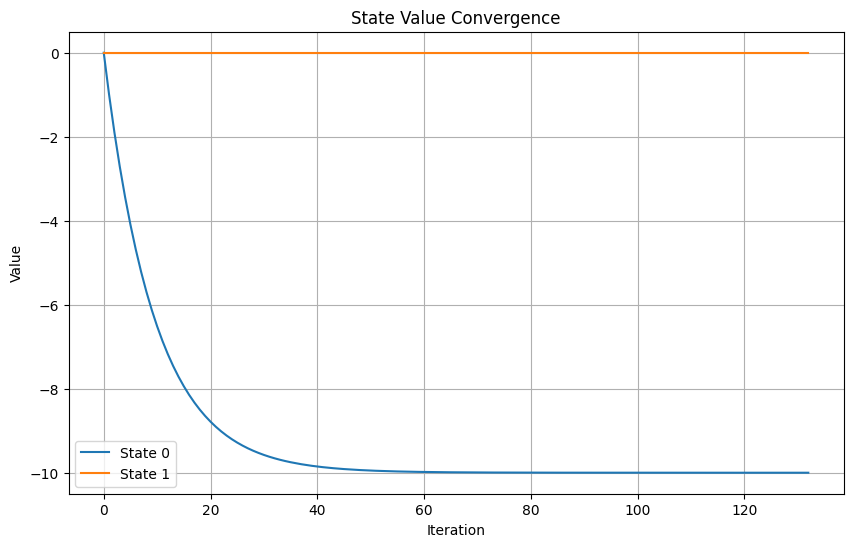

In [10]:
if __name__ == '__main__':
    env = SimpleMDP(p_success=0.8)
    V, policy, value_history = robust_value_iteration(env, epsilon=1e-6, discount_factor=0.9, theta=0.1)

    print("Optimized Values:")
    for state, value in V.items():
      print(f"State: {state}, Value: {value:.2f}")

    print("\nOptimized Policy:")
    for state, action in policy.items():
      if action is not None:
        print(f"State: {state}, Action: {action}")
    
    # 状態価値の収束をグラフで表示
    plt.figure(figsize=(10, 6))
    for state in env.state_space:
        state_values = [hist[state] for hist in value_history]
        plt.plot(range(len(state_values)), state_values, label=f'State {state}')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('State Value Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()

### 非凸二重ループアルゴリズム(RMDPではない)

Stochastic Recursive Gradient Descent Ascent for Stochastic Nonconvex-Strongly-Concave Minimax Problems

Solving a Class of Non-Convex Min-Max Games Using Iterative First Order Methods

(Jin et al., 2020; Luo et al., 2020; Razaviyayn et al., 2020; Zhang et al., 2020）


* 内側ループを一定以上の精度で解ければ、rectangluarの仮定がなくても最適方策を学習できます(←まじ？)。


### 方策勾配法 for RMDP
* 拡張Mirror discent法Li et al., 2022
	* (s,a)-rectangularを仮定したうえで解かれている。



## 情報の断片
**遷移、報酬の推定誤差が及ぼす影響**
Mannorらは、価値関数が、遷移関数や報酬関数の推定誤差に敏感であるという可能性を示しました。


**RMDPは何に対してロバストか**
RMDPの解(最適価値関数)は遷移確率や報酬関数の推定誤差に鈍感です。つまり推定誤差に対してロバストです。

**rectangularあれこれ**
* 低ランクMDP（線形MDP）の場合、$r$-rectangularという仮定を使う。
* $s$-rectangularは(s,a)-rectangularより保守的[75]であり、この仮定を用いた研究は、(Le Tallec, 2007; Wiesemann et al., 2013; Derman et al., 2021; Wang et al., 2022)です。

**RMDPの課題**
* RMDPの総報酬(=価値関数)は方策に関して微分可能ではないし、凸でもないです。つまり劣勾配は存在しない。(劣勾配は、必ずしも微分可能でない凸関数の上で定義されるため)
* 価値関数をモロー包絡線という凸性をもった関数で近似することを考えますが、RMDPにおいては最適方策を獲得するために十分であることが示されています。
* 近似することで凸になるので劣勾配を求めることができ、射影勾配法が使えるのでは

**RMDPについて**
$$

\min _{\boldsymbol{\pi} \in \Pi} \max _{\boldsymbol{p} \in \mathcal{P}} J_{\boldsymbol{\rho}}(\boldsymbol{\pi}, \boldsymbol{p}):=\boldsymbol{\rho}^{\top} \boldsymbol{v}^{\boldsymbol{\pi}, \boldsymbol{p}}=\sum_{s \in \mathcal{S}} \rho_{s} v_{s}^{\boldsymbol{\pi}, \boldsymbol{p}} \tag{2}
$$
未知の真の遷移カーネルが含まれるようにすることで、(2)の最適方策は実際には信頼性の高いパフォーマンスを実現できます（Russell & Petrik, 2019; Behzadian et al., 2021b; Panaganti et al., 2022）
